In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.utils import to_categorical , plot_model
from keras.datasets import mnist 

In [2]:
(x_train , y_train ) , (x_test , y_test ) = mnist.load_data()
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

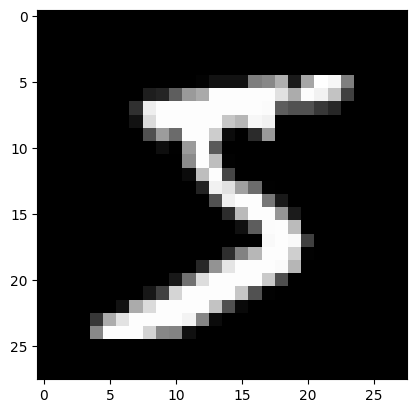

In [3]:
plt.imshow(x_train[0] , cmap='gray')

#### Scale the data

In [4]:
x_train = x_train / 255
x_test = x_test / 255

### Build the model

In [10]:
model = Sequential()

#First convolutional layer
model.add(Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3), activation='relu'))
#First Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Second Convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
#Second Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
#Input Layer
model.add(Dense(256 , activation='relu'))
#Hidden Layer
model.add(Dense(128 , activation="relu"))
#Output Layer
model.add(Dense(10 , activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [12]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="adam" , metrics=["accuracy"])


In [13]:
model.fit(x_train , y_train , epochs=10 , batch_size=10)


Epoch 1/10


6000/6000 [==============================] - 32s 5ms/step - loss: 0.1228 - accuracy: 0.9621
Epoch 2/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0474 - accuracy: 0.9857
Epoch 3/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0354 - accuracy: 0.9895
Epoch 4/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0279 - accuracy: 0.9913
Epoch 5/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0204 - accuracy: 0.9938
Epoch 6/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0207 - accuracy: 0.9939
Epoch 7/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0176 - accuracy: 0.9949
Epoch 8/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0155 - accuracy: 0.9954
Epoch 9/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0140 - accuracy: 0.9960
Epoch 10/10
6000/6000 [==============================] - 31s 5ms/step -

In [14]:
model.evaluate(x_test , y_test , batch_size=1)

10000/10000 [==============================] - 37s 4ms/step - loss: 0.0548 - accuracy: 0.9910


[0.05480409041047096, 0.9909999966621399]

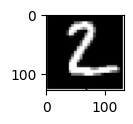

In [25]:
import cv2
img = cv2.imread("img.jpg" , 0)
plt.figure(figsize=(1,1))
plt.imshow(img , cmap="gray")

In [26]:
img = cv2.resize(img, (28, 28))


In [27]:
img = img/255
img = img.reshape(1,28,28)
result = model.predict(img)
np.argmax(result)

1/1 [==============================] - 0s 32ms/step


2